Setting Up Environment and Dataset



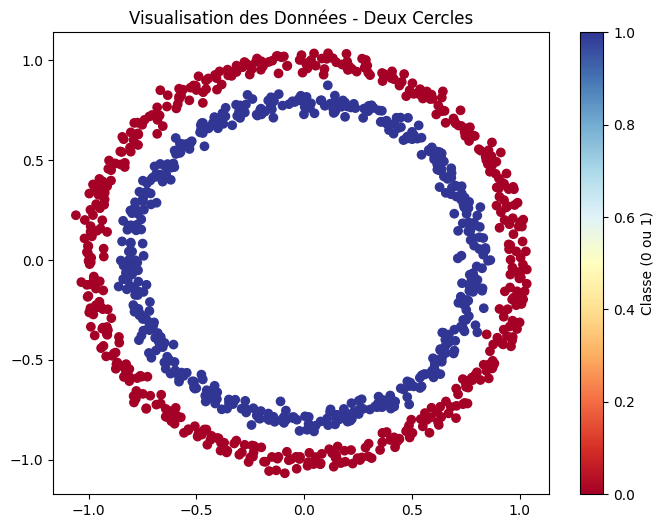

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

# Création DataSet
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Visualisation des Données - Deux Cercles")
plt.colorbar(label="Classe (0 ou 1)")
plt.show()



Cette visualisation montre deux cercles (un rouge, un bleu) qui représentent nos deux classes. Le but du modèle sera d'apprendre à séparer ces deux cercles.

# Séparation des données (70% train, 10% val, 20% test)


In [17]:
from sklearn.model_selection import train_test_split

# Séparation en 70% train, 10% validation, 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)  # 20% test

x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val,
    test_size=0.125,  # 0.125 * 80% = 10% du total
    random_state=42
)

print("\nRépartition des données:")
print(f"- Train: {len(x_train)} échantillons (70%)")
print(f"- Val:   {len(x_val)} échantillons (10%)")
print(f"- Test:  {len(x_test)} échantillons (20%)")


Répartition des données:
- Train: 700 échantillons (70%)
- Val:   100 échantillons (10%)
- Test:  200 échantillons (20%)


Création d'un réseau d'un seul neurone

In [34]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid")
]) # Missing closing parenthesis added here

model_1.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("\nEntraînement du modèle de base...")
history_1 = model_1.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    verbose=0
)

# Évaluation
_, train_acc = model_1.evaluate(x_train, y_train, verbose=0)
_, val_acc = model_1.evaluate(x_val, y_val, verbose=0)
print(f"Performance modèle de base - Train: {train_acc*100:.1f}%, Val: {val_acc*100:.1f}%")


Entraînement du modèle de base...
Performance modèle de base - Train: 48.4%, Val: 50.0%


    Sequential: Modèle où les couches s'ajoutent les unes après les autres

    Dense(1): Couche avec 1 neurone (la plus simple possible)

    BinaryCrossentropy: Fonction de perte adaptée à la classification binaire

    SGD: Optimiseur de base (Stochastic Gradient Descent)

    epochs=50: Nombre de passages sur tout le dataset

Ce modèle aura de mauvaises performances car il est trop simple.

Amélioration du modèle

In [38]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),  # Couche cachée
    tf.keras.layers.Dense(10, activation="relu"),  # 2ème couche
    tf.keras.layers.Dense(1, activation="sigmoid") # Sortie
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

print("\nEntraînement du modèle amélioré...")
history_2 = model_2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    verbose=0
)

# Évaluation
_, train_acc = model_2.evaluate(x_train, y_train, verbose=0)
_, val_acc = model_2.evaluate(x_val, y_val, verbose=0)
print(f"Performance modèle amélioré - Train: {train_acc*100:.1f}%, Val: {val_acc*100:.1f}%")


Entraînement du modèle amélioré...
Performance modèle de base - Train: 100.0%, Val: 100.0%


    Architecture plus profonde: 2 couches cachées de 10 neurones

    Fonction ReLU: Meilleure pour les couches cachées (évite le vanishing gradient)

    Optimiseur Adam: Plus sophistiqué que SGD, avec taux d'apprentissage adaptatif


#  b) Modèle avec fonctions d'activation variées


In [39]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=0
)

# Évaluation
_, train_acc = model_3.evaluate(x_train, y_train, verbose=0)
_, val_acc = model_3.evaluate(x_val, y_val, verbose=0)
print(f"Performance modèle amélioré - Train: {train_acc*100:.1f}%, Val: {val_acc*100:.1f}%")

Performance modèle amélioré - Train: 100.0%, Val: 100.0%


    Combinaison de ReLU (1ère couche) et tanh (2ème couche)

    tanh: Sortie centrée entre -1 et 1 (peut aider dans certains cas)

Visualisation de la frontière de décision du modèle

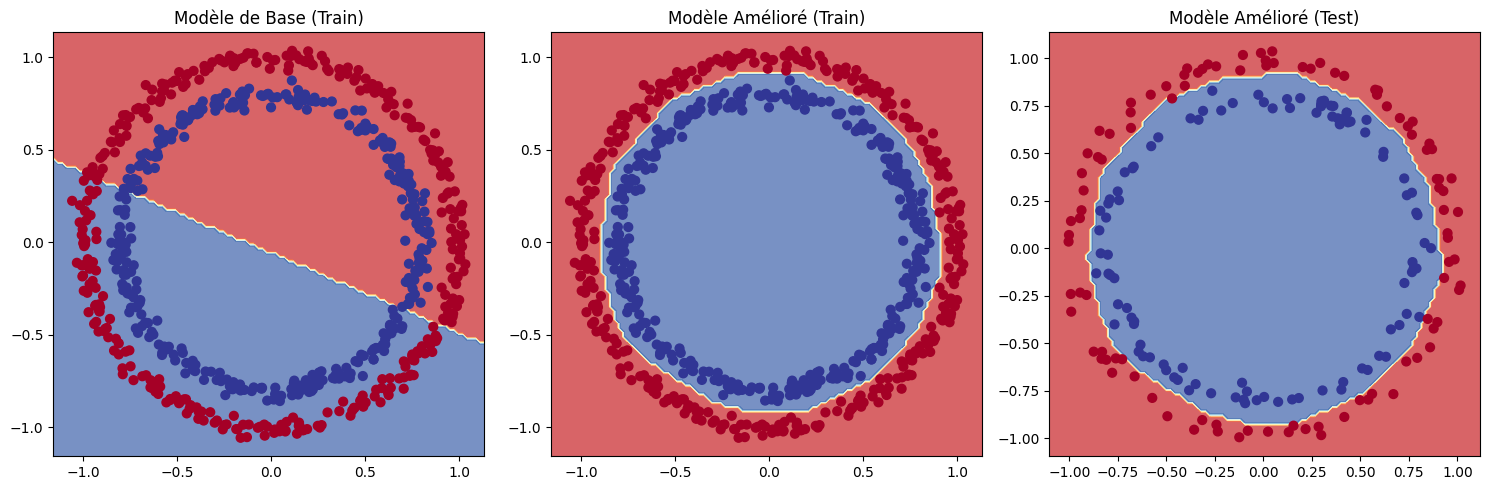

In [37]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_grid = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_grid, verbose=0)
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_decision_boundary(model_1, x_train, y_train)
plt.title("Modèle de Base (Train)")

plt.subplot(1, 3, 2)
plot_decision_boundary(model_2, x_train, y_train)
plt.title("Modèle Amélioré (Train)")

plt.subplot(1, 3, 3)
plot_decision_boundary(model_2, x_test, y_test)
plt.title("Modèle Amélioré (Test)")
plt.tight_layout()
plt.show()

Cette visualisation montre comment le modèle sépare les deux classes.
Une bonne frontière devrait suivre le cercle entre les deux classes.

Modèle de base: Frontière linéaire (incapable de séparer les cercles)
Modèle amélioré: Frontière non-linéaire complexe qui suit la forme des données
Performance similaire sur train et test → pas de sur-ajustement

Prédicitions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


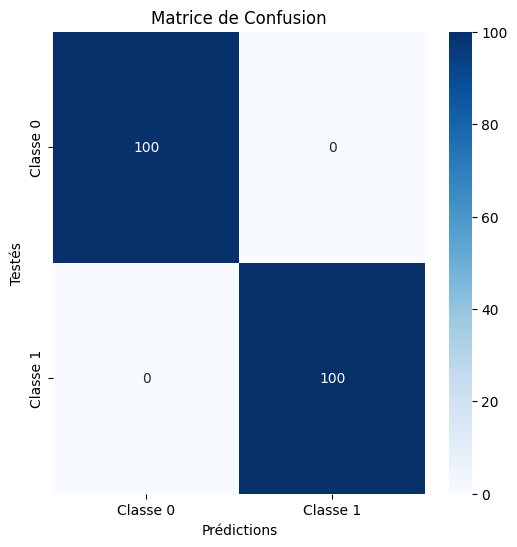

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions sur l'ensemble de test
y_pred = model_2.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matrice de Confusion")
plt.ylabel('Testés')
plt.xlabel('Prédictions')
plt.show()

Toutes les pédictions sont bonnes à 100%

Evalutuon des performances

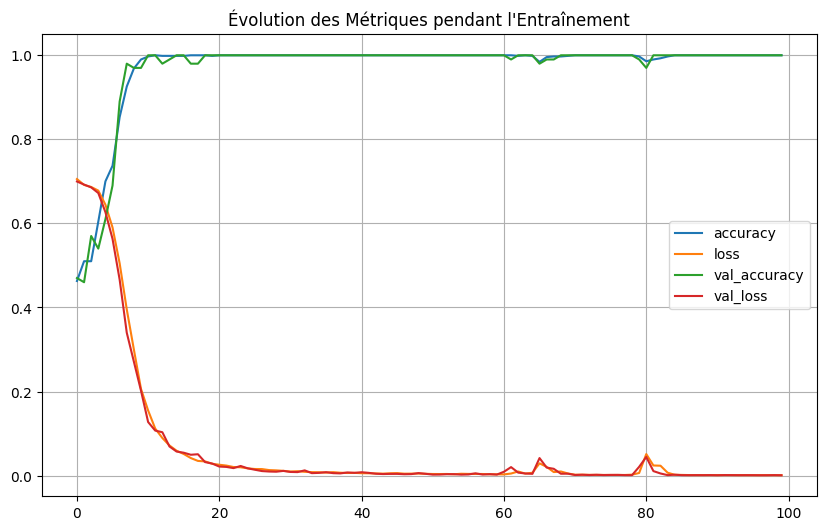


Performance finale sur le test set:
- Accuracy: 100.00%
- Loss: 0.0063

5 exemples de prédictions:
Échantillon 8:
- Features: [-0.74891503 -0.2951126 ]
- Vérité: 1 | Prédiction: 1
- Probabilité: 0.9999

Échantillon 22:
- Features: [-0.66792317  0.42861492]
- Vérité: 1 | Prédiction: 1
- Probabilité: 1.0000

Échantillon 178:
- Features: [0.41871463 0.68428294]
- Vérité: 1 | Prédiction: 1
- Probabilité: 0.9999

Échantillon 69:
- Features: [ 0.93176289 -0.15661761]
- Vérité: 0 | Prédiction: 0
- Probabilité: 0.0023

Échantillon 33:
- Features: [ 0.07645155 -0.80826051]
- Vérité: 1 | Prédiction: 1
- Probabilité: 1.0000



In [31]:
# Courbes d'apprentissage
pd.DataFrame(history_2.history).plot(figsize=(10, 6))
plt.title("Évolution des Métriques pendant l'Entraînement")
plt.grid(True)
plt.show()

# Performance finale
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=0)
print(f"\nPerformance finale sur le test set:")
print(f"- Accuracy: {test_acc*100:.2f}%")
print(f"- Loss: {test_loss:.4f}")

# Exemple de prédictions
print("\n5 exemples de prédictions:")
for i in np.random.choice(len(x_test), 5):
    print(f"Échantillon {i}:")
    print(f"- Features: {x_test[i]}")
    print(f"- Vérité: {y_test[i]} | Prédiction: {y_pred_classes[i][0]}")
    print(f"- Probabilité: {y_pred[i][0]:.4f}\n")

LE modèle fonctionne trop bien pour être représentatif d'un cas réel. Cela suggère soit :
  Un problème artificiellement simple (comme prévu avec des cercles concentriques)
  Une fuite involontaire des données entre train/test
  Un problème de normalisation qui pourrait créer du surapprentissage